# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential (SEQ)

In [23]:
# Choose the file
DATASET=40

In [24]:
seq = get_standardized_measures(f"results/sequential_{DATASET}.csv")

In [25]:
seq.describe()

,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
count,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,2.339257e+07,1.104073e+08,33158.200000,3.903778e+08,2.353634e+09,4.061661e+07,2.918461e+09
std,1.296199e+06,3.103078e+06,2350.948043,1.776649e+07,3.254690e+06,3.715162e+05,1.611049e+07
min,2.250110e+07,1.055128e+08,30127.000000,3.653309e+08,2.350644e+09,4.017772e+07,2.895848e+09
25%,2.282372e+07,1.100939e+08,31969.000000,3.815398e+08,2.350889e+09,4.042404e+07,2.911772e+09
50%,2.292953e+07,1.107944e+08,32872.000000,3.945932e+08,2.352560e+09,4.048837e+07,2.922173e+09
75%,2.302420e+07,1.116571e+08,34615.000000,3.981689e+08,2.356154e+09,4.090323e+07,2.922864e+09
max,2.568432e+07,1.139780e+08,36208.000000,4.122562e+08,2.357922e+09,4.108968e+07,2.939649e+09


In [26]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

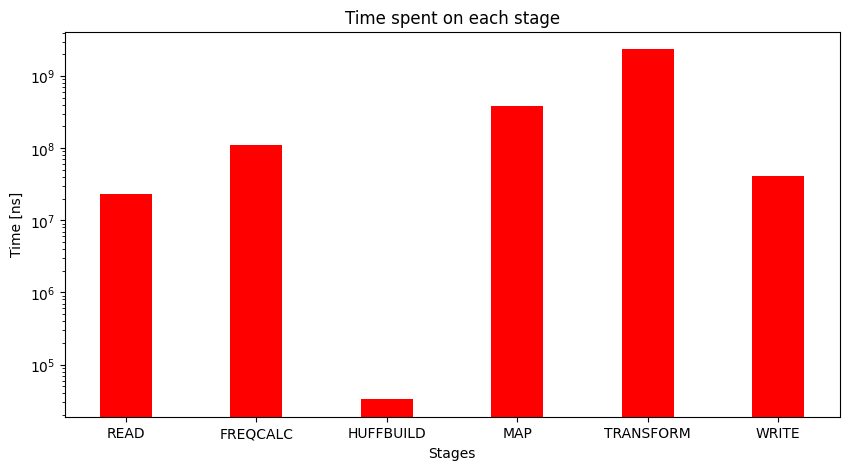

In [27]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)

plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [28]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [29]:
def plot_for_p(p_degree):
    thr_data = thr[thr['P_DEGREE'] == p_degree]
    thr_means = [thr_data[stage].mean() for stage in seq_stages]
    width = 0.3  # the width of the bars
    multiplier = 0
    
    cl = ["r","b"]
    label=["Sequential", "Parallel"]
    import numpy as np
    x = np.arange(len(seq_stages))
    fig, ax = plt.subplots(layout='constrained', figsize=(10,5))
    for attribute, measurement in zip(seq_stages, np.array([seq_means, thr_means]) ):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, -width,  color=cl[multiplier], align="edge", label=label[multiplier])
       
        #ax.bar_label(rects, padding=2)
        multiplier += 1
        ax.set_xticklabels(["0", 'READ', 'FREQCALC', 'HUFFBUILD', 'MAP', 'TRANSFORM', 'WRITE'])
        ax.set_xlabel("Stages")
        ax.set_ylabel("Time [ns]")
        ax.set_yscale('log')
        ax.set_title("Time spent on each stage")
    plt.legend()
    plt.show()

/tmp/ipykernel_342497/3040245533.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["0", 'READ', 'FREQCALC', 'HUFFBUILD', 'MAP', 'TRANSFORM', 'WRITE'])
/tmp/ipykernel_342497/3040245533.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["0", 'READ', 'FREQCALC', 'HUFFBUILD', 'MAP', 'TRANSFORM', 'WRITE'])


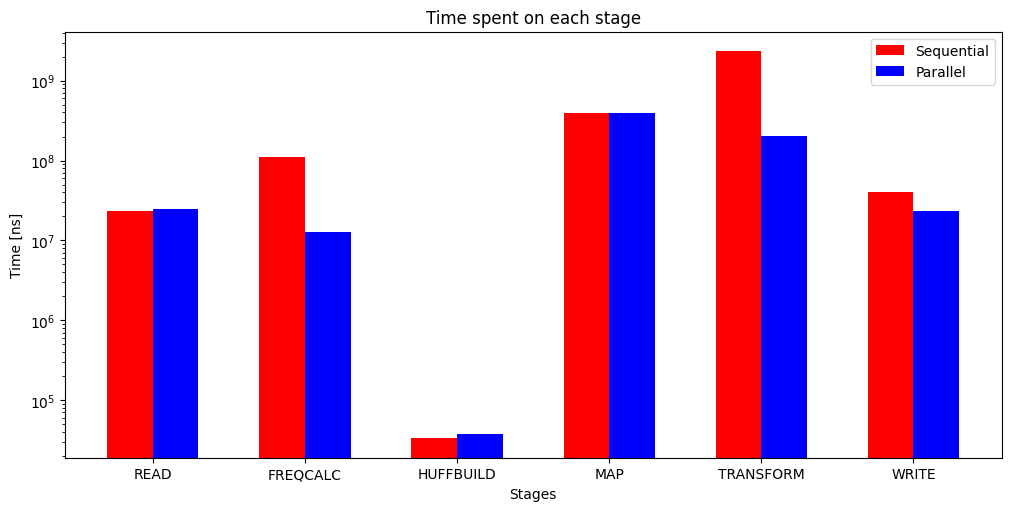

In [30]:
plot_for_p(11)